In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Load the data
ALL3 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/AII 3.0_final.csv', sep=';')
SCL92 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/SCL-92_final.csv', sep=';')
BDI = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/BDI-II_final.csv', sep=';')
BERN = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/Bern_final.csv', sep=';')
IIP64 = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/IIP64_final.csv', sep=';')
RFQ = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/RFQ_final.csv', sep=';')
SIPP = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/SIPP-SV_final.csv', sep=';')
TPQ = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/TPQ_final.csv', sep=';')
WAI_patient = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/WAI_patient_final.csv', sep=';')
WAI_therapist = pd.read_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/Final Processed Questionnaire Files/WAI_therapist_final.csv', sep=';')

In [30]:
# contain all the dataframes in a list
dataframes = [ALL3, SCL92, BDI, BERN, IIP64, RFQ, SIPP, TPQ, WAI_patient] # WAI_therapist is not included as it relates to the therapist and not the patient

This is the IDs I have permission to do analyses on: ACL21, CK23, HHC07, HSN28, JLHN28, KT02, LSM13, LGH04, MP15, NMJ10, NSP24

In [31]:


# Rename all columns called 'Patient ID' to 'Patient'
for i in range(len(dataframes)):
    df = dataframes[i]
    if 'Patient ID' in df.columns:
        df.rename(columns={'Patient ID': 'Patient'}, inplace=True)
    if 'PATIENT' in df.columns:
        df.rename(columns={'PATIENT': 'Patient'}, inplace=True)

# This is the IDs I have permission to do analyses on
allowed_ids = ['ACL21', 'CK23', 'HHC07', 'HSN28', 'JLIHN28', 'KTO2', 'LSM13', 'LGH04', 'MP15', 'NMJ10', 'NSP24']

# For all the dataframes only keep these ID's
for i in range(len(dataframes)):
    df = dataframes[i]
    df = df[df['Patient'].isin(allowed_ids)]
    dataframes[i] = df


In [32]:
# Unlist the dataframes and assign back to their original names
ALL3, SCL92, BDI, BERN, IIP64, RFQ, SIPP, TPQ, WAI_patient = dataframes

The following sections do 2 things: 1; they preprocess the data that is used for the final BNN's, 2; they explain what each questionnaire is, and how they can be used as predictors or a single overall predictor for the final BNN. 

IIP64 is a questionnaire that pertains to interpersonal problems (Inventory of Interpersonal Problems) 

In [42]:
RFQ

,Patient,Order,Date,Total LRFc items,Total LRFu items
0,ACL21,1,24/05/19,33,57
20,CK23,1,X,11,75
34,HHC07,1,15/01/19,9,86
37,HSN28,1,01.03.19,7,97
38,HSN28,2,x,"9,2",80
63,MP15,1,22/03/17,24,58
64,MP15,2,01.10.17,17,70
65,MP15,3,28/11/17,9,85
67,NSP24,1,05.04.19,2,110


In [33]:
IIP64

,Patient,Order,Date,Raw score Domineering/controlling,Raw score Vindictive/Self-centered,Raw score Cold/distant,Raw score Socially inhibited,Raw score nonassertive,Raw scores Overly accommodating,Raw score Self-sacrificing,Raw score Intrusive/Needy,Total score
0,ACL21,1.0,24/05/19,4,5,16,14,11,8,17,4,79
11,CK23,1.0,X,2,5,0,0,19,22,24,14,86
22,HSN28,1.0,x,13,19,18,12,7,14,13,14,110
35,MP15,1.0,22/03/17,18,13,16,17,24,20,23,21,152
36,MP15,2.0,01.10.17,7,4,2,6,3,9,7,12,50
37,MP15,3.0,28/11/17,18,7,10,10,13,15,17,18,108
39,NSP24,1.0,05.04.19,6,17,7,7,13,18,13,13,94


In [35]:
WAI_patient

,Patient,Order,DATE:,FILLING DATE:,Factor 1 cumulative average: task,Factor 2 cumulative average: bond,Factor 3 cumulative averge: goal,Total score
0,ACL21,1,02.10.19 12:03,02.10.19 12:03,"4,5","5,25","5,25",60
65,CK23,1,17.05.18 18:34,17.05.18 18:34,7,"6,25",7,81
66,CK23,2,22.05.18 8:29,22.05.18 8:29,7,6,7,80
67,CK23,3,29.05.18 11:50,29.05.18 11:50,"5,5","6,5","6,5",74
68,CK23,4,06.06.18 13:38,06.06.18 13:38,6,6,"5,25",69
107,HHC07,1,03.04.19 7:22,03.04.19 7:22,"6,75",7,"6,75",82
109,HSN28,1,07.08.18 19:27,07.08.18 19:27,"5,5",5,"5,5",64
197,LSM13,1,15.09.17 13:34,15.09.17 13:34,"5,5","5,25","5,25",64
198,LSM13,2,19.09.17 19:55,19.09.17 19:55,5,"5,75",6,67
231,MP15,1,11.05.17 19:16,11.05.17 19:16,"4,25",4,4,49


In [37]:
WAI_therapist

,Therapist,Order,DATE:,FILLING DATE:,Factor 1 cumulative average: Task,Factor 2 cumulative average: Bond,Factor 3 cumulative average: Goal,Total score
0,YBVY,1,21.04.17 16:13,21.04.17 16:13,"6,5","5,5","5,5",70
1,YBVY,2,25.04.17 9:36,25.04.17 9:36,"5,75","5,25","4,5",62
2,YBVY,3,02.05.17 9:22,02.05.17 9:22,5,5,"4,5",58
3,YBVY,4,05.05.17 9:12,05.05.17 9:12,"6,5","5,25",5,67
4,YBVY,5,16.05.17 9:40,16.05.17 9:40,"6,5","5,5","4,75",67
...,...,...,...,...,...,...,...,...
69,YBVY,70,31.08.18 7:49,31.08.18 7:49,7,"5,5","5,5",72
70,YBVY,71,31.08.18 10:00,31.08.18 10:00,6,"5,25",5,65
71,YBVY,72,03.09.18 10:01,03.09.18 10:01,6,5,5,64
72,YBVY,73,27.03.19 10:35,27.03.19 10:35,"6,25","4,75",5,64


The following section preprocesses the HRV-RR interpolated data and makes it fit for regression using rolling window

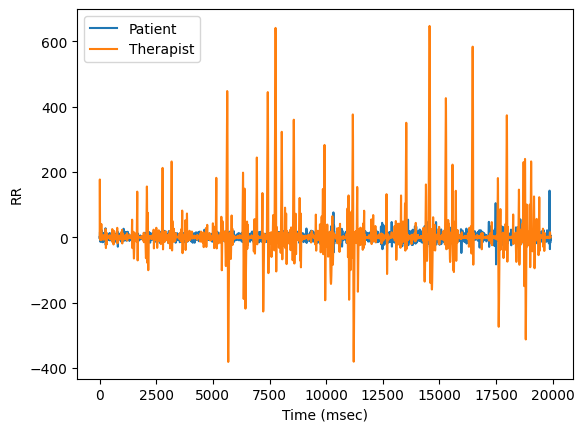

In [275]:
# session 5
#with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HHC07/HHC07_S05_20190327_P_RR.txt') as f: 
#    lines_P_2 = f.readlines()

# session 5
#with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HHC07/HHC07_S05_20190327_T_RR.txt') as f:
#    lines_T_2 = f.readlines()

# session 6
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HHC07/HHC07_S06_20190403_P_RR.txt') as f:
    lines_P_2 = f.readlines()

# session 6
with open('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HHC07/HHC07_S06_20190403_T_RR.txt') as f:
    lines_T_2 = f.readlines()

# put lines in a dataframe
df_P_2 = pd.DataFrame(lines_P_2)
df_T_2 = pd.DataFrame(lines_T_2)

# merge the two dataframes (one has more rows than the other)
df_2 = pd.concat([df_P_2, df_T_2], axis=1)

# rename columns
df_2.columns = ['Patient', 'Therapist']

# remove first 5 rows
df_2 = df_2.iloc[7:]

# remove all rows with 'NaN'
df_2 = df_2.dropna()

# remove ,\n from the end of each row
df_2['Patient'] = df_2['Patient'].str.replace(',\n', '')
df_2['Therapist'] = df_2['Therapist'].str.replace(',\n', '')

# make the columns numeric
df_2['Patient'] = pd.to_numeric(df_2['Patient'])
df_2['Therapist'] = pd.to_numeric(df_2['Therapist'])

# plot the data
plt.plot(df_2['Patient'], label='Patient')
plt.plot(df_2['Therapist'], label='Therapist')
plt.xlabel('Time (msec)')
plt.ylabel('RR')
plt.legend()
plt.show()

In [276]:
# make a function where a rolling window is applied to make the Patient rows predictors for the Therapist rows
def make_predictors(df, window_size):
    predictors = []
    for i in range(len(df) - window_size):
        predictors.append(df.iloc[i:i+window_size]['Therapist'].values)
    return pd.DataFrame(predictors)

# make the predictors
predictors100 = make_predictors(df_2, 100)
predictors25 = make_predictors(df_2, 25)
predictors5 = make_predictors(df_2, 5)
predictors1 = make_predictors(df_2, 1)

# make the target and predictors the same length
predictors100 = predictors100.iloc[:len(target)]
predictors25 = predictors25.iloc[:len(target)]
predictors5 = predictors5.iloc[:len(target)]
predictors1 = predictors1.iloc[:len(target)]







In [277]:

# make the target
target = df_2['Patient']
# make the target a pandas dataframe
target = pd.DataFrame(target)


In [278]:
# make the predictors a single column with the mean of the window
predictors100 = predictors100.apply(lambda x: np.mean(x), axis=1)
predictors25 = predictors25.apply(lambda x: np.mean(x), axis=1)
predictors5 = predictors5.apply(lambda x: np.mean(x), axis=1)
predictors1 = predictors1.apply(lambda x: np.mean(x), axis=1)

# make the predictors a pandas dataframe
predictors100 = pd.DataFrame(predictors100)
predictors25 = pd.DataFrame(predictors25)
predictors5 = pd.DataFrame(predictors5)
predictors1 = pd.DataFrame(predictors1)

In [279]:
# remove the first row of target as I am predicting the next value in therapist based on the previous values in patient
target = target.iloc[1:]



In [280]:
# remove the index
target.reset_index(drop=True, inplace=True)
predictors1.reset_index(drop=True, inplace=True)
predictors5.reset_index(drop=True, inplace=True)
predictors25.reset_index(drop=True, inplace=True)
predictors100.reset_index(drop=True, inplace=True)

In [281]:
# merge all the predictors and target
df_all = pd.concat([predictors1, predictors5, predictors25, predictors100, target], axis=1)


In [282]:
# print the 100th row in df_2
df_all.columns = ['Predictor1', 'Predictor5', 'Predictor25', 'Predictor100', 'target']

In [283]:
# push the all the rows in Predicor5 5 rows down 
df_all['Predictor5'] = df_all['Predictor5'].shift(5)
df_all['Predictor25'] = df_all['Predictor25'].shift(25)
df_all['Predictor100'] = df_all['Predictor100'].shift(100)


In [284]:
# remove nan aka the first 100 rows
df_all = df_all.dropna()

In [285]:
# remove the index
df_all.reset_index(drop=True, inplace=True)

In [287]:
# write the dataframe to a csv file withou an index
df_all.to_csv('/Users/kristian/Documents/Skole/9. Semester/Thesis Preparation/Code/BNNs/Data/HHC07_S06_20190403_RR.csv', index=False)